In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3830'
feature_detection_method = 'pasef'

In [3]:
MAXIMUM_Q_VALUE = 0.01

In [4]:
BASE_RESULTS_DIR = '/media/big-ssd'
# BASE_RESULTS_DIR = '/Users/darylwilding-mcbride/Downloads'.format(experiment_name)

#### identifications with correction for saturation

In [5]:
IDENTIFICATIONS_WITH_CS_DIR = '{}/results-P3830/P3830-results-cs-true-fmdw-false-2021-05-19-13-53-24/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_CS_DIR, experiment_name, feature_detection_method)

In [6]:
# load the identifications
with open(IDENTIFICATIONS_WITH_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_cs_df = d['identifications_df']
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_with_cs_df['protein id'].str.contains('YEAST'))]

In [7]:
s1 = identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,218,79.9
monoisotopic_saturated_adjusted,54,19.8
no_nonsaturated_isotopes,1,0.4


In [8]:
print('number of unique proteins: {}'.format(len(identifications_with_cs_df['protein id'].unique())))

number of unique proteins: 19


#### identifications without correction for saturation

In [9]:
IDENTIFICATIONS_WITHOUT_CS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-false-2021-05-19-17-54-56/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_CS_DIR, experiment_name, feature_detection_method)

In [10]:
# load the identifications
with open(IDENTIFICATIONS_WITHOUT_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_cs_df = d['identifications_df']
identifications_without_cs_df = identifications_without_cs_df[(identifications_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_without_cs_df['protein id'].str.contains('YEAST'))]

In [11]:
print('number of unique proteins: {}'.format(len(identifications_without_cs_df['protein id'].unique())))

number of unique proteins: 19


#### using the Top3 approach to determine protein quanitification

In [12]:
ups2_proteins_l = []

ups2_proteins_l.append({'uniprot':'P00915', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P00918', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P01031', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P69905', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P68871', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P41159', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P02768', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P62988', 'fmoles':50000})

ups2_proteins_l.append({'uniprot':'P04040', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P00167', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P01133', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P02144', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P15559', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P62937', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'Q06830', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P63165', 'fmoles':5000})

ups2_proteins_l.append({'uniprot':'P00709', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P06732', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P12081', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P61626', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'Q15843', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P02753', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P16083', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P63279', 'fmoles':500})

ups2_proteins_l.append({'uniprot':'P01008', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P61769', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P55957', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'O76070', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P08263', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01344', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01127', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P10599', 'fmoles':50})

ups2_proteins_l.append({'uniprot':'P99999', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P06396', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P09211', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01112', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01579', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P02787', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'O00762', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P51965', 'fmoles':5})

ups2_proteins_l.append({'uniprot':'P08758', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02741', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P05413', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10145', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02788', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10636-8', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P00441', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P01375', 'fmoles':0.5})

ups2_d = {}
for p in ups2_proteins_l:
    ups2_d[p['uniprot']] = p['fmoles']

#### with correction

In [13]:
identifications_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P00918ups|CAH2_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'P69905ups|HBA_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P62988ups|UBIQ_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_UPS,O76070ups|SYUG_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P63165ups|SUMO1_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS'], dtype=object)

In [14]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_with_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_with_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [15]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_with_df[top3_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

2319.0333333333333

In [16]:
top3_with_df['calculated_pmoles'] = top3_with_df.average_intensity / universal_signal_response_factor

In [17]:
# calculate the CV for the signal response factor
cv = top3_with_df.signal_response_factor.std() / top3_with_df.signal_response_factor.mean()
cv

1.1493894200596158

In [18]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_with_df[(top3_with_df.intensity_adjusted == True)]) / len(top3_with_df) * 100,1))

'64.3% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [19]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_without_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_without_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [20]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_without_df[top3_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1715.8933333333334

In [21]:
top3_without_df['calculated_pmoles'] = top3_without_df.average_intensity / universal_signal_response_factor

In [22]:
# calculate the CV for the signal response factor
cv = top3_without_df.signal_response_factor.std() / top3_without_df.signal_response_factor.mean()
cv

1.1731338296562206

#### calculate correlation

In [23]:
combined_df = pd.merge(top3_with_df, top3_without_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_with','_without'])

In [24]:
len(combined_df)

14

In [25]:
combined_df[['pmoles_with','average_intensity_with','average_intensity_without','calculated_pmoles_with','calculated_pmoles_without']].sample(n=10)

,pmoles_with,average_intensity_with,average_intensity_without,calculated_pmoles_with,calculated_pmoles_without
0,50.0,51605.000000,46840.000000,22.252806,27.297734
4,50.0,115951.666667,85794.666667,50.000000,50.000000
2,50.0,38038.333333,21637.666667,16.402668,12.610147
11,50.0,48142.000000,39346.000000,20.759512,22.930330
1,50.0,50845.666667,44935.333333,21.925371,26.187720
12,50.0,18814.666667,18814.666667,8.113151,10.964940
5,5.0,40783.666667,35444.000000,17.586494,20.656296
3,5.0,6118.000000,6118.000000,2.638168,3.565490
9,5.0,3289.000000,3289.000000,1.418263,1.916786
10,5.0,1740.000000,1740.000000,0.750313,1.014049


In [26]:
combined_df[combined_df.protein.str.startswith('P02768')]

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
4,P02768ups|ALBU_HUMAN_UPS,50.0,115951.666667,2319.033333,129,True,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0,50.0,85794.666667,1715.893333,127,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0


In [27]:
combined_df.sort_values(by=['pmoles_with'], ascending=False, inplace=False)

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
0,P00915ups|CAH1_HUMAN_UPS,50.0,51605.000000,1032.100000,21,True,"[{'feature_id': 829701, 'sequence': 'HDTSLKPIS...",22.252806,50.0,46840.000000,936.800000,21,"[{'feature_id': 829701, 'sequence': 'HDTSLKPIS...",27.297734
1,P00918ups|CAH2_HUMAN_UPS,50.0,50845.666667,1016.913333,19,True,"[{'feature_id': 2161501, 'sequence': 'YDPSLKPL...",21.925371,50.0,44935.333333,898.706667,19,"[{'feature_id': 2161501, 'sequence': 'YDPSLKPL...",26.187720
2,P01031ups|CO5_HUMAN_UPS,50.0,38038.333333,760.766667,4,True,"[{'feature_id': 613701, 'sequence': 'CCYDGACVN...",16.402668,50.0,21637.666667,432.753333,4,"[{'feature_id': 613701, 'sequence': 'CCYDGACVN...",12.610147
4,P02768ups|ALBU_HUMAN_UPS,50.0,115951.666667,2319.033333,129,True,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.000000,50.0,85794.666667,1715.893333,127,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.000000
8,P41159ups|LEP_HUMAN_UPS,50.0,35351.333333,707.026667,29,True,"[{'feature_id': 3952601, 'sequence': 'VTGLDFIP...",15.243995,50.0,31006.666667,620.133333,29,"[{'feature_id': 3952601, 'sequence': 'VTGLDFIP...",18.070276
11,P68871ups|HBB_HUMAN_UPS,50.0,48142.000000,962.840000,12,True,"[{'feature_id': 2713501, 'sequence': 'VLGAFSDG...",20.759512,50.0,39346.000000,786.920000,12,"[{'feature_id': 2713501, 'sequence': 'VLGAFSDG...",22.930330
12,P69905ups|HBA_HUMAN_UPS,50.0,18814.666667,376.293333,17,True,"[{'feature_id': 667601, 'sequence': 'VGAHAGEYG...",8.113151,50.0,18814.666667,376.293333,17,"[{'feature_id': 667601, 'sequence': 'VGAHAGEYG...",10.964940
3,P02144ups|MYG_HUMAN_UPS,5.0,6118.000000,1223.600000,6,False,"[{'feature_id': 1141101, 'sequence': 'VEADIPGH...",2.638168,5.0,6118.000000,1223.600000,6,"[{'feature_id': 1141101, 'sequence': 'VEADIPGH...",3.565490
5,P04040ups|CATA_HUMAN_UPS,5.0,40783.666667,8156.733333,8,True,"[{'feature_id': 3697701, 'sequence': 'GPLLVQDV...",17.586494,5.0,35444.000000,7088.800000,8,"[{'feature_id': 3697701, 'sequence': 'GPLLVQDV...",20.656296
7,P15559ups|NQO1_HUMAN_UPS,5.0,14905.666667,2981.133333,4,True,"[{'feature_id': 834301, 'sequence': 'ALIVLAHSE...",6.427534,5.0,13049.333333,2609.866667,4,"[{'feature_id': 834301, 'sequence': 'ALIVLAHSE...",7.604979


In [28]:
universal_signal_response_factor_with = combined_df[combined_df.protein.str.startswith('P15559')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_df[combined_df.protein.str.startswith('P15559')].iloc[0].signal_response_factor_without

In [29]:
combined_df['calculated_pmoles_with'] = combined_df.average_intensity_with / universal_signal_response_factor_with
combined_df['calculated_pmoles_without'] = combined_df.average_intensity_without / universal_signal_response_factor_without

In [30]:
combined_df['pmoles_with'].corr(combined_df['calculated_pmoles_with'])

0.6753453132806627

In [31]:
combined_df['pmoles_without'].corr(combined_df['calculated_pmoles_without'])

0.6865460617111798

#### Universal signal-response curve for the absolute quantification of the standard proteins

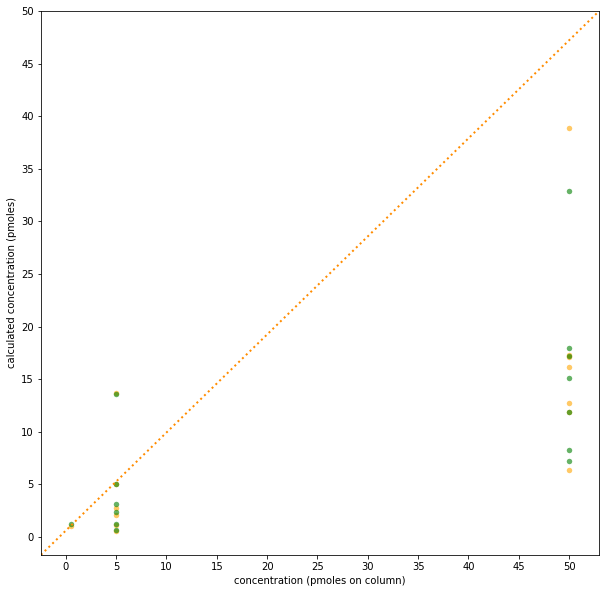

In [32]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.pmoles_with, combined_df.calculated_pmoles_with, marker='o', lw=0, s=30, alpha=0.6, c='orange')
ax.scatter(combined_df.pmoles_without, combined_df.calculated_pmoles_without, marker='o', lw=0, s=30, alpha=0.6, c='green')

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

# plt.xlim((-1,55.0))
# plt.ylim((-1,55.0))

nearest = 5.0
range_l = round(combined_df.pmoles_with.min() / nearest) * nearest
range_u = round(combined_df.pmoles_with.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))
plt.yticks(np.arange(range_l,range_u+nearest,nearest))

plt.xlabel('concentration (pmoles on column)')
plt.ylabel('calculated concentration (pmoles)')

plt.show()

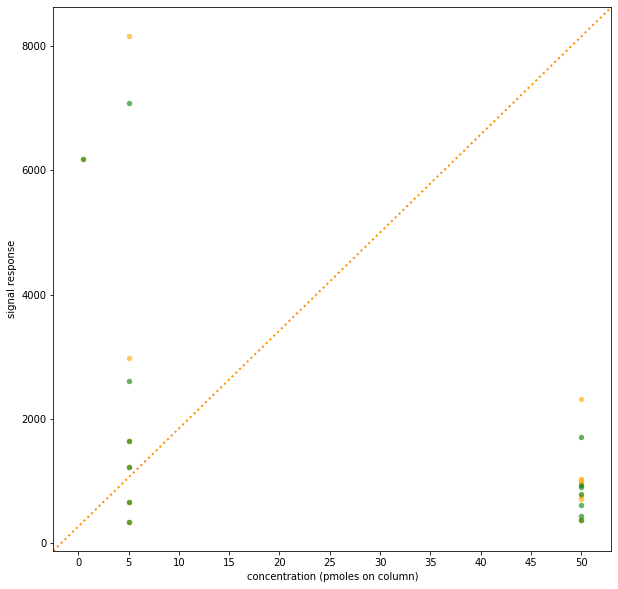

In [33]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.pmoles_with, combined_df.signal_response_factor_with, marker='o', lw=0, s=30, alpha=0.6, c='orange')
ax.scatter(combined_df.pmoles_without, combined_df.signal_response_factor_without, marker='o', lw=0, s=30, alpha=0.6, c='green')

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

# plt.xlim((-1,55.0))
# plt.ylim((-1,55.0))

nearest = 5.0
range_l = round(combined_df.pmoles_with.min() / nearest) * nearest
range_u = round(combined_df.pmoles_with.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

nearest = 2000.0
range_l = round(combined_df.signal_response_factor_with.min() / nearest) * nearest
range_u = round(combined_df.signal_response_factor_with.max() / nearest) * nearest
plt.yticks(np.arange(range_l,range_u+nearest,nearest))

plt.xlabel('concentration (pmoles on column)')
plt.ylabel('signal response')

plt.show()